<a href="https://colab.research.google.com/github/osadose/osadose/blob/main/MHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install saspy
import saspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 21.5 MB/s eta 0:00:00


Importing and manipulating the Dataset

In [2]:
data = pd.read_sas(r'/content/drive/MyDrive/BRFSS dataset/LLCP2022.XPT ', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


In [3]:
data.shape

(445132, 328)

In [4]:
pd.set_option('display.max_columns', 50)

MHPD=data[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
           'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'ACEDEPRS', 'CAREGIV1', 'RRCLASS3',
           'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'ACEDRINK',
           'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK', 'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CSRVTRT3',
           'HAVARTH4', '_HCVU652', 'VETERAN3', 'MARIJAN1', 'CIMEMLOS', 'LSATISFY', 'FIREARM5']]

MHPD.shape

(445132, 44)

REcoding Variables

# New section

In [6]:
MHPD.dtypes

,0
_STATE,float64
_SEX,float64
_AGE_G,float64
_BMI5CAT,float64
MARITAL,float64
CHILDREN,float64
_EDUCAG,float64
_INCOMG1,float64
EMPLOY1,float64
RENTHOM1,float64


In [7]:
MHPD.isnull().sum()

,0
_STATE,0
_SEX,0
_AGE_G,0
_BMI5CAT,48806
MARITAL,8
CHILDREN,9312
_EDUCAG,0
_INCOMG1,0
EMPLOY1,6196
RENTHOM1,9


In [8]:
MHPD.describe()

,_STATE,_SEX,_AGE_G,_BMI5CAT,MARITAL,CHILDREN,_EDUCAG,_INCOMG1,EMPLOY1,RENTHOM1,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,POORHLTH,CHECKUP1,ACEDEPRS,CAREGIV1,RRCLASS3,SLEPTIM1,_RFHLTH,_RFDRHV8,_HLTHPLN,_SMOKER3,DRNKANY6,_DRNKWK2,ALCDAY4,ACEDRINK,EXERANY2,DECIDE,BLIND,DIFFWALK,DIABETE4,CVDSTRK3,ASTHMA3,CHCSCNC1,CSRVTRT3,HAVARTH4,_HCVU652,VETERAN3,MARIJAN1,CIMEMLOS,LSATISFY,FIREARM5
count,445132.000000,445132.000000,445132.000000,396326.000000,445124.000000,4.358200e+05,445132.000000,445132.000000,438936.000000,445123.000000,445129.000000,445127.000000,445129.000000,445125.000000,255746.000000,445129.000000,48286.000000,98510.000000,161738.000000,445129.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,4.451320e+05,404369.000000,48231.000000,445130.000000,424146.000000,425277.00000,422977.000000,445129.000000,445130.000000,445130.000000,445130.000000,17302.000000,445129.000000,445132.000000,440959.000000,94919.000000,64675.000000,254488.000000,39800.000000
mean,31.005942,1.529942,4.381817,3.005160,2.418382,6.665297e+01,3.091618,5.411543,3.860800,1.417907,2.580133,59.178589,58.418234,1.829138,51.867849,1.455430,1.990308,1.841184,3.770023,7.912277,1.201284,1.952403,1.373143,3.837466,2.243148,1.142494e+04,516.028281,1.899339,1.255566,1.924899,1.96760,1.864002,2.750982,1.975508,1.871307,1.956997,2.819212,1.691626,4.264456,1.901816,79.351921,1.955748,1.684461,2.088492
std,16.652065,0.499103,1.611986,0.835494,1.827092,3.734262e+01,1.041218,2.368884,2.895042,0.925601,1.084509,37.584444,37.835814,0.607915,38.849062,1.134532,1.135251,0.649955,14.347859,8.164575,0.558108,2.509682,1.576053,1.753290,2.314231,3.137973e+04,357.738842,1.074484,0.534058,0.600152,0.43896,0.536942,0.756820,0.380928,0.497664,0.521036,1.639220,0.641802,3.888355,0.513543,23.745502,0.693711,0.914356,1.829461
min,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,101.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,1.000000,3.000000,2.000000,1.000000,8.800000e+01,2.000000,4.000000,1.000000,1.000000,2.000000,14.000000,14.000000,2.000000,7.000000,1.000000,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.397605e-79,202.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,88.000000,2.000000,1.000000,1.000000
50%,30.000000,2.000000,5.000000,3.000000,1.000000,8.800000e+01,3.000000,5.000000,2.000000,1.000000,3.000000,88.000000,88.000000,2.000000,88.000000,1.000000,2.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,4.000000,2.000000,4.700000e+01,230.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,88.000000,2.000000,2.000000,2.000000
75%,46.000000,2.000000,6.000000,4.000000,4.000000,8.800000e+01,4.000000,7.000000,7.000000,2.000000,3.000000,88.000000,88.000000,2.000000,88.000000,1.000000,2.000000,2.000000,1.000000,8.000000,1.000000,1.000000,1.000000,4.000000,2.000000,6.000000e+02,888.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,5.000000,2.000000,9.000000,2.000000,88.000000,2.000000,2.000000,2.000000
max,78.000000,2.000000,6.000000,4.000000,9.000000,9.900000e+01,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,99.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.990000e+04,999.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000


<ipython-input-9-1179eb5d1850>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MHPD['MENTHLTH'], kde=False, bins=10);


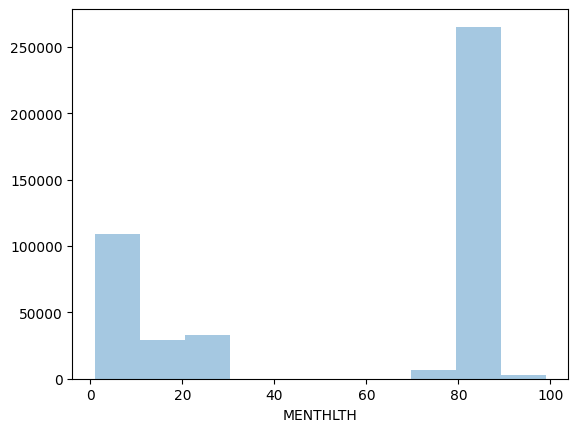

In [9]:
sns.distplot(MHPD['MENTHLTH'], kde=False, bins=10);

<Axes: >

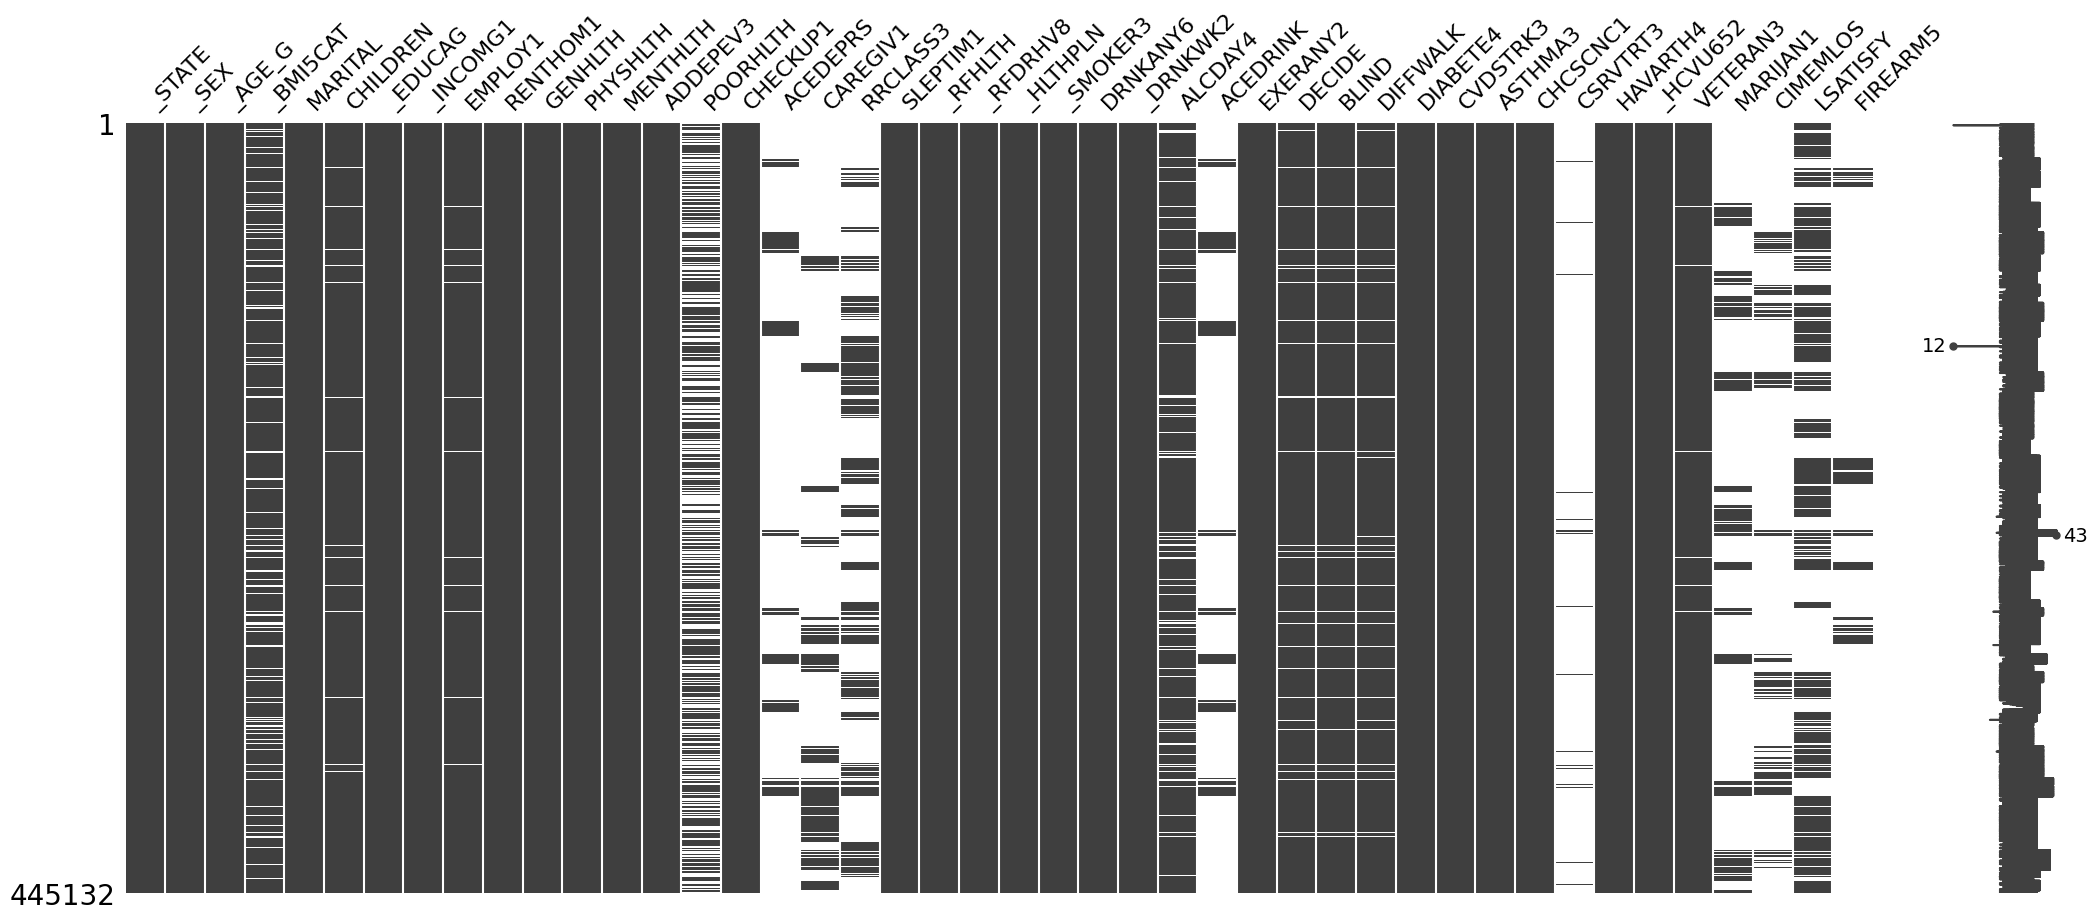

In [10]:
!pip install missingno
import missingno as msno

msno.matrix(MHPD)